# Loading data

## Loading training set

In [3]:
import os
import os.path
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

def load_train_data():
    core_path = os.environ['GITHUB_PATH']
    file_path = os.path.join(core_path, 'education/kaggle/house-prices-advanced-regression-techniques/train.csv')

    return pd.read_csv(file_path)

housing = load_train_data()

## Loading test set

In [4]:
def load_test_data():
    core_path = os.environ['GITHUB_PATH']
    file_path = os.path.join(core_path, 'education/kaggle/house-prices-advanced-regression-techniques/test.csv')

    return pd.read_csv(file_path)

housing_test = load_test_data()

In [43]:
# housing_test.info()

In [31]:
test_na_columns = housing_test.columns[housing_test.isna().any()].tolist()

In [6]:
train_na_columns = housing.columns[housing.isna().any()].tolist()

In [42]:
# list(set(test_na_columns) - set(train_na_columns))

# Investigation of data

In [41]:
# housing.info()

In [40]:
corr_matrix = housing.corr()
# corr_matrix["SalePrice"].sort_values(ascending=False)

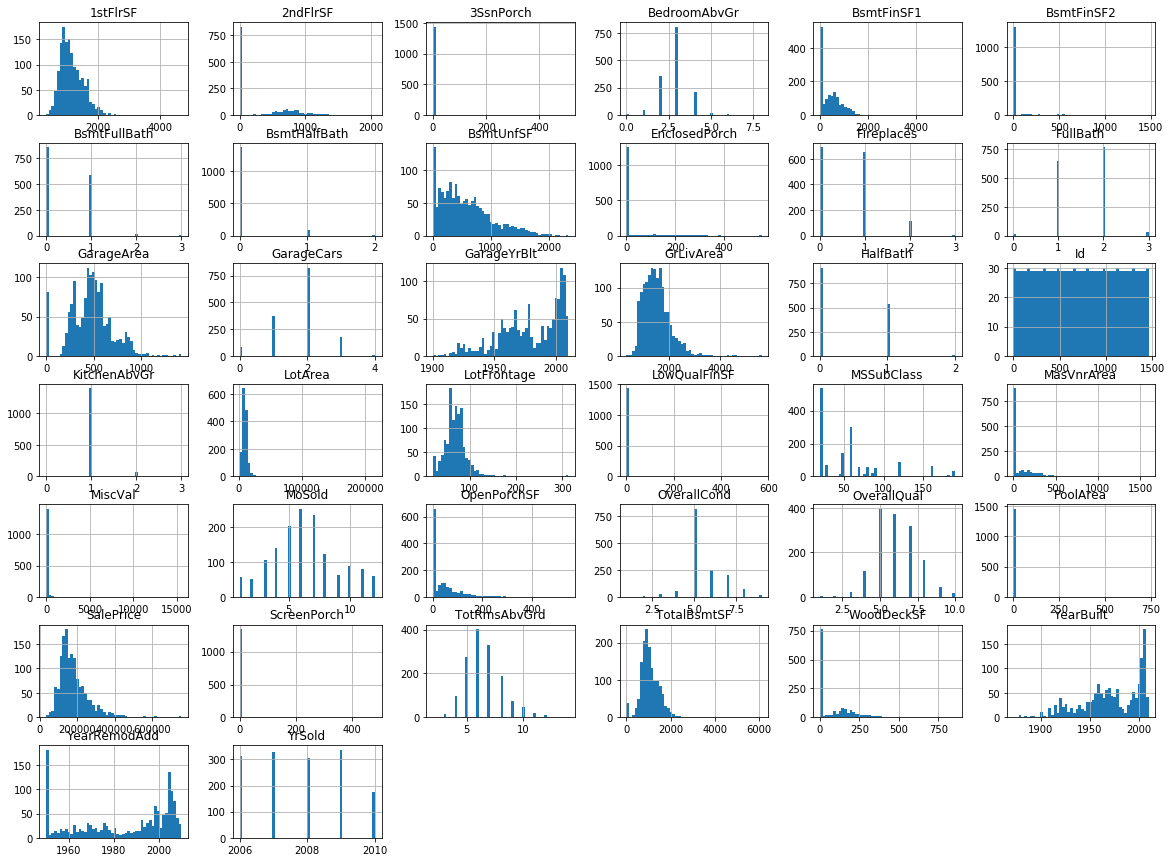

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Test set

In [337]:
# On the one hand we can divide training set to 2 parts as if it's real contest with closed test set
# On the other hand we loss data and our train set is already "train", so we can use it whole.

# from sklearn.model_selection import train_test_split

# random_train_set, random_test_set = train_test_split(housing, test_size=0.2, random_state=42)



# Copy of data

In [25]:
housing_train = housing.drop(columns=['SalePrice'])
housing_y = housing['SalePrice']
# housing_train = random_train_set.copy()
# housing_train.info()

# NA filling

In [26]:
housing.columns[housing.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

## NA mapper

In [33]:
#https://www.mikulskibartosz.name/preprocessing-the-input-pandas-dataframe-using-columntransformer-in-scikit-learn/
from sklearn.impute import SimpleImputer 
from sklearn_pandas import DataFrameMapper, gen_features
from collections import Iterable

def get_column_names(features):
    names = []
    for f in features:
        col = f[0]
        if isinstance(col, Iterable):
            for v in col:
                names.append(v)
        else:
            names.append(col)
    return names

def add_imputer(features, column_names, imputer_dict):
    columns_2d = [[a] for a in column_names]
    feature_def = gen_features(
        columns=columns_2d,
        classes=[imputer_dict]
    )
    for f in feature_def:
        features.append(f)
        
def get_pass_columns(df, features, to_remove_list):
    gen_column_names = get_column_names(features)

    all_columns_list = df.columns.values.tolist()
    pass_coumns = list(set(all_columns_list) - 
                   (set(gen_column_names) | set(to_remove_list)))
    return pass_coumns

def add_pass_imputer(features, columns):
    pass_feature_def = gen_features(
        columns=columns,
        classes=[None]
    )
    for f in pass_feature_def:
        features.append(f)

na_to_none_columns_text = """
Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
"""

na_to_none_columns = na_to_none_columns_text.split()

na_to_mode_columns = [
    'Electrical',
    'MSZoning',
    'Functional',
    'KitchenQual',
    'Utilities',
    'SaleType',
    'Exterior1st',
    'Exterior2nd'
]
na_to_zero_columns = [
    'MasVnrArea',
    'BsmtFinSF2',
    'BsmtFullBath',
    'BsmtHalfBath',
    'GarageArea',
    'TotalBsmtSF',
    'GarageCars',
    'BsmtFinSF1',
    'BsmtUnfSF'
]
na_to_mean_columns = [
    'LotFrontage'
]

to_be_removed = ['GarageYrBlt']
        
all_fixed_features = []
add_imputer(all_fixed_features, na_to_mode_columns,
           {'class': SimpleImputer, 'strategy': 'most_frequent'})
add_imputer(all_fixed_features, na_to_none_columns,
           {'class': SimpleImputer, 'strategy': 'constant', 'fill_value': 'None'})
add_imputer(all_fixed_features, na_to_zero_columns,
           {'class': SimpleImputer, 'strategy': 'constant', 'fill_value': 0.0})
add_imputer(all_fixed_features, na_to_mean_columns,
           {'class': SimpleImputer, 'strategy': 'mean'})
    

# gen_column_names = get_column_names(all_fixed_features)

# all_columns_list = housing_train.columns.values.tolist()
# pass_coumns = list(set(all_columns_list) - 
#                    (set(gen_column_names) | set(to_be_removed)))

pass_columns = get_pass_columns(housing_train, all_fixed_features, to_be_removed)
add_pass_imputer(all_fixed_features, pass_columns)
# pass_feature_def = gen_features(
#     columns=pass_coumns,
#     classes=[None]
# )

# for f in pass_feature_def:
#     all_fixed_features.append(f)


na_mapper = DataFrameMapper(all_fixed_features, df_out=True)



# na_to_none_columns_2d
# column_names = pd.Index(na_preprocessor.get_feature_names())
# column_names
# housing_wo_na = pd.DataFrame(housing_wo_na_array, index=housing.index, columns=housing.columns)

# housing_wo_na.columns[housing_wo_na.isna().any()].tolist()

### Train data NA filling

In [34]:
housing_wo_na_df = na_mapper.fit_transform(housing_train)
housing_wo_na_df.columns[housing_wo_na_df.isna().any()].tolist()

[]

### Test data NA filling

In [35]:
housing_test_wo_na_df = na_mapper.fit_transform(housing_test)
housing_test_wo_na_df.columns[housing_test_wo_na_df.isna().any()].tolist()

[]

## OHE mapper

In [36]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_attribs = list(housing_wo_na_df.select_dtypes(['object']).columns)
cat_attribs_2d = [[a] for a in cat_attribs]

cat_attribs_feature_def = gen_features(
    columns=cat_attribs_2d,
    classes=[{'class': OneHotEncoder, 'sparse': False}]
)

cat_mapper = DataFrameMapper(cat_attribs_feature_def, df_out=True, default=None)


### Train OHE transform

In [37]:
housing_ohe_df = cat_mapper.fit_transform(housing_wo_na_df)
# housing_ohe_df.columns

### Test OHE transform

In [38]:
housing_test_ohe_df = cat_mapper.fit_transform(housing_test_wo_na_df)

## Selecting by correlation

In [50]:
housing_ohe_df_and_y = housing_ohe_df.copy()
housing_ohe_df_and_y['SalePrice'] = housing_y

corr_matrix_ohe = housing_ohe_df_and_y.corr()
corr_res = corr_matrix_ohe['SalePrice'].abs().sort_values(ascending=False)

features = corr_res.index[corr_res.values>0.2].values
housing_train_x = housing_ohe_df_and_y[features].drop(columns=['SalePrice'])
housing_train_y = housing_ohe_df_and_y['SalePrice']
# housing_data_x.info()

In [51]:
housing_train_x.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'ExterQual_x0_TA', 'FullBath', 'BsmtQual_x0_Ex',
       'TotRmsAbvGrd', 'YearBuilt', 'KitchenQual_x0_TA', 'YearRemodAdd',
       'KitchenQual_x0_Ex', 'Foundation_x0_PConc', 'MasVnrArea',
       'FireplaceQu_x0_None', 'Fireplaces', 'ExterQual_x0_Gd',
       'BsmtQual_x0_TA', 'ExterQual_x0_Ex', 'BsmtFinType1_x0_GLQ',
       'HeatingQC_x0_Ex', 'GarageFinish_x0_Fin', 'GarageFinish_x0_Unf',
       'Neighborhood_x0_NridgHt', 'BsmtFinSF1', 'MasVnrType_x0_None',
       'SaleType_x0_New', 'GarageType_x0_Detchd', 'SaleCondition_x0_Partial',
       'Foundation_x0_CBlock', 'FireplaceQu_x0_Gd', 'GarageType_x0_Attchd',
       'LotFrontage', 'MasVnrType_x0_Stone', 'Neighborhood_x0_NoRidge',
       'WoodDeckSF', 'KitchenQual_x0_Gd', '2ndFlrSF', 'OpenPorchSF',
       'HeatingQC_x0_TA', 'BsmtExposure_x0_Gd', 'Exterior2nd_x0_VinylSd',
       'Exterior1st_x0_VinylSd', 'MSZoning_x0_RM', 'HalfBath',
       'Gara

In [39]:
# corr_res[features]

## Data scaling and normalization

## RMSLE

In [46]:
# https://stackoverflow.com/a/47623068/3663499
# https://www.kaggle.com/jpopham91/rmlse-vectorized
def rmsle(y, y0, **kwargs):
    assert(len(y) == len(y0))
    return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y0))))

## First simple model for first glance

In [53]:
X = housing_train_x.values
y = housing_train_y.values

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np

tree_reg = DecisionTreeRegressor()
rmsle_scorer = make_scorer(rmsle)

scores = cross_val_score(tree_reg, X, y,
                         scoring=rmsle_scorer, cv=10)
print(np.mean(scores))

0.20274696371842976


### Test data preparation
We keep only columns with good correlation

In [60]:
housing_test_X = housing_test_ohe_df[housing_train_x.columns].values

### Predict on test data

In [63]:
tree_reg_first_model = DecisionTreeRegressor()

tree_reg_first_model = tree_reg_first_model.fit(X, y)
first_predict_prices = tree_reg_first_model.predict(housing_test_X)

first_submission_df = pd.DataFrame({'Id': housing_test.Id, 'SalePrice': first_predict_prices})

### Saving of result

In [64]:
core_path = os.environ['GITHUB_PATH']
submission1_file_path = os.path.join(core_path, 'education/kaggle/house-prices-advanced-regression-techniques/submission1.csv')
first_submission_df.to_csv(submission1_file_path, index=False)

## Kaggle first result and thoughts about it

0.22733
place in leadership is 4150 of 4744
Not good...

Cross-correlation shown 0.20275, so it looks like the model is overfitted a bit.
So now need to read books, prepare data well and select best model locally on train data first, then make second attempt to send results...


# Features engineering

In [347]:
bathrooms_diff = housing['FullBath'] - housing['YearBuilt']
years_diff = years_diff[years_diff.notna()].abs()
print('Years diff mean = {:.2f}, std = {:.2f}'.format(years_diff.mean(), years_diff.std()))

Years diff mean = 5.60, std = 16.56


In [348]:
housing_wo_na["YrSold"].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [349]:
housing_wo_na_tmp = housing_wo_na.drop('SalePrice').copy()
housing_lables = housing_wo_na_tmp['SalePrice'].copy()

KeyError: "['SalePrice'] not found in axis"

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# cat_attribs = ['MSSubClass', 'MSZoning']
cat_attribs = list(housing_wo_na_tmp.select_dtypes(['object']).columns)
num_attribs = list(housing_wo_na_tmp.select_dtypes(['number']).columns)


num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('atd_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse=False))
])


In [ ]:
from sklearn.pipeline import FeatureUnion
import numpy as np

full_pipeline = FeatureUnion(transformer_list = [
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

housing_prepared = full_pipeline.fit_transform(housing_wo_na_tmp)

one_hot_encoder = OneHotEncoder(sparse=False)
housing_onehot_features = one_hot_encoder.fit_transform(housing_wo_na_tmp[cat_attribs])
# housing_onehot_features.shape
onehot_columns = one_hot_encoder.get_feature_names(cat_attribs)
all_columns = pd.Index(np.concatenate([num_attribs, onehot_columns]))

housing_prepared_df = pd.DataFrame(housing_prepared, columns=all_columns)
corr_matrix_train2 = housing_prepared_df.corr()
corr_res = corr_matrix_train2['SalePrice'].abs().sort_values(ascending=False)
# corr_res
# corr_res[(corr_res[1]>0.2)]

In [ ]:
features = corr_res.index[corr_res.values>0.2].values
# housing_prepared_df['SalePrice']
housing_data_x = housing_prepared_df[features].drop(columns=['SalePrice'])
# housing_prepared_df
housing_data_y = housing_prepared_df['SalePrice']
# housing_data_y


In [ ]:
corr_matrix_train.shape